In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import IsolationForest

%matplotlib inline

## Data Loading and Initial Inspection

In [76]:
df = pd.read_csv("dataset.csv")

print("Shape: " + str(df.shape))

print("First 10 rows of the dataset:")
display(df.head(10))

print("Dataset Info:")
df.info()

print("Missing values per column:")
display(df.isnull().sum())

print("\nNumber of Duplicates:", df.duplicated().sum())

print(df.columns)

Shape: (500000, 26)
First 10 rows of the dataset:


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,mMC7oPiW,Kayla Martin,Wendy Bennett,Excellent,sunny,Congested Traffic,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-1.291560,...,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,A2SNLxxM,James Burch,Casey Cannon,Excellent,windy,Flow Traffic,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-1.291195,...,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
7,tT6AJSJx,Alexander Ingram,Christy Hensley,Good,sunny,Congested Traffic,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-1.290694,...,1,2,2012,42.533214,36.829343,16.949505,20.548489,12.449213,4.155444,2.236596
8,D0Yb52vL,Anita Porter,Ana Norton,Excellent,rainy,Dense Traffic,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-1.291656,...,12,0,2012,42.240568,29.608237,23.942272,11.667601,3.637447,1.253232,-1.119470
9,GorULe8F,Monica Smith,Daniel Vargas,Very Good,sunny,Dense Traffic,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-1.291206,...,9,2,2009,42.218767,33.106804,20.538553,16.193381,8.129651,2.849627,0.327463


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  i

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0



Number of Duplicates: 0
Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


## Remove Outliers

In [77]:
def remove_outliers_forest(df, columns, contamination=0.05, random_state=42):
    df_clean = df.copy()

    iso = IsolationForest(contamination=contamination, random_state=random_state)
    iso.fit(df_clean[columns])

    preds = iso.predict(df_clean[columns])

    df_clean = df_clean[preds == 1]
    return df_clean

numeric_columns = ['fare_amount', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance']
df = remove_outliers_forest(df, columns=numeric_columns, contamination=0.05, random_state=42)

print(df.head())
df.shape

    User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   

   Traffic Condition                            key  fare_amount  \
0  Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1       Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2  Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3       Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4  Congested Traffic  2010-03-09 07:51:00.000000135          5.3   

       pickup_datetime  pickup_longitude  ...  month  weekday  year  \
0  2009-06-15 17:26:21         -1.288826  ...      6        0  2009   
1  2

(475000, 26)

 ## Datatime Fixing

In [78]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['year'] = df['pickup_datetime'].dt.year

display(df[['pickup_datetime', 'hour', 'day', 'month', 'weekday', 'year']].head())

,pickup_datetime,hour,day,month,weekday,year
0,2009-06-15 17:26:21,17,15,6,0,2009
1,2010-01-05 16:52:16,16,5,1,1,2010
2,2011-08-18 00:35:00,0,18,8,3,2011
3,2012-04-21 04:30:42,4,21,4,5,2012
4,2010-03-09 07:51:00,7,9,3,1,2010


## Descriptive Statistics

In [79]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,475000.000000,475000,475000.000000,475000.000000,474995.000000,474995.000000,475000.000000,475000.000000,475000.000000,475000.000000,475000.000000,475000.000000,474995.000000,474995.000000,474995.000000,474995.000000,474995.000000,474995.000000,474995.000000
mean,10.320634,2012-03-18 11:54:01.157286656,-1.291171,0.711262,-1.291136,0.711263,1.681954,13.518524,15.675964,6.264861,3.042922,2011.732606,42.326751,35.151951,19.300932,18.402302,10.597178,2.932711,0.315990
min,-18.100000,2009-01-01 00:31:32,-1.295232,0.000000,-1.295120,0.707174,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,12.882117,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141550
25%,6.000000,2010-08-15 03:24:37.249999872,-1.291412,0.711005,-1.291399,0.710992,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.416676,32.057505,16.973300,14.701309,6.972170,1.241928,-0.865176
50%,8.100000,2012-03-15 22:27:21,-1.291235,0.711290,-1.291210,0.711297,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.521613,34.525131,19.390257,18.018171,10.137256,2.102782,-0.116239
75%,12.100000,2013-10-17 15:24:40.500000,-1.291011,0.711531,-1.290959,0.711545,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.699810,37.741667,21.812983,21.776727,13.789781,3.716336,2.280205
max,400.000000,2015-06-30 23:38:21,0.000000,0.713502,-1.287491,0.713676,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,75.546892,71.405153,62.993670,53.641891,45.194757,22.727695,3.141593
std,7.015520,NaN,0.001919,0.001110,0.000449,0.000489,1.306516,6.517153,8.680049,3.440885,1.946524,1.862663,2.692721,4.261816,3.831434,4.989620,4.824880,2.557381,1.826918


## Fare Amount Distribution

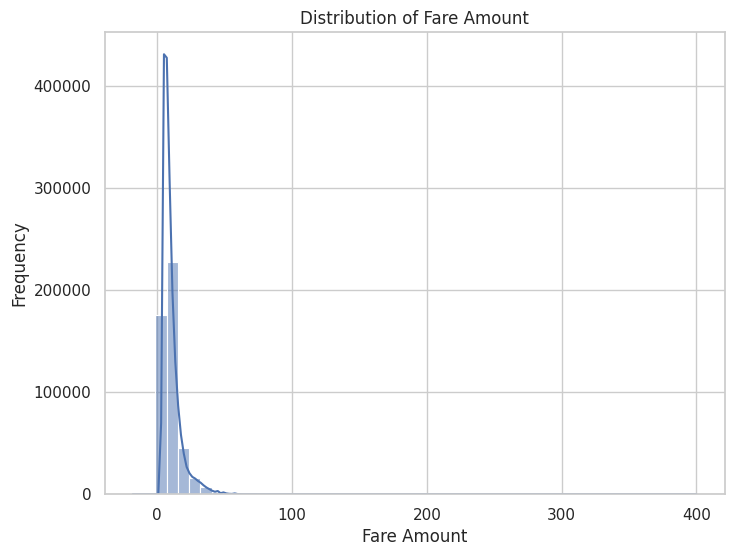

In [80]:
plt.figure(figsize=(8,6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

## Trip Distance Distribution

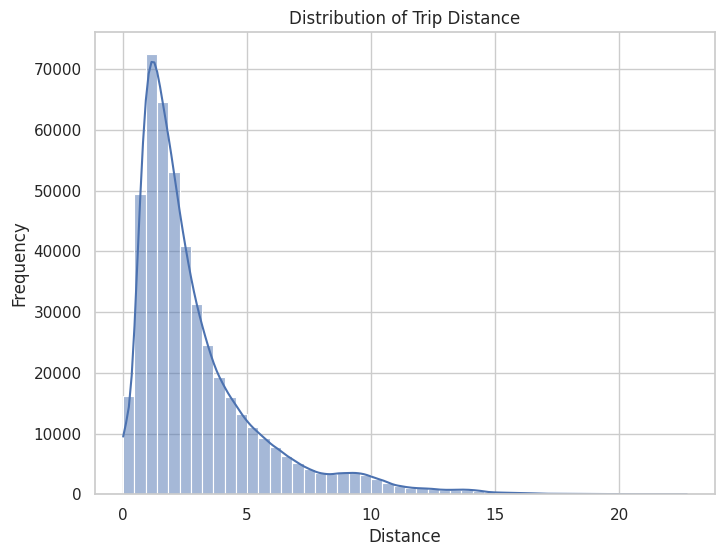

In [81]:
plt.figure(figsize=(8,6))
sns.histplot(df['distance'], bins=50, kde=True)
plt.title("Distribution of Trip Distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

## Passenger Count Distribution

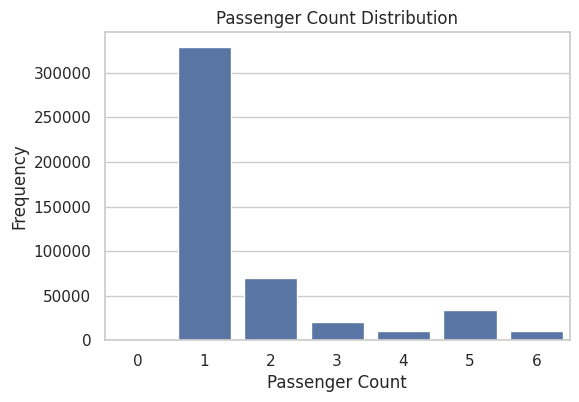

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(x='passenger_count', data=df)
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()

## Categorical Variables

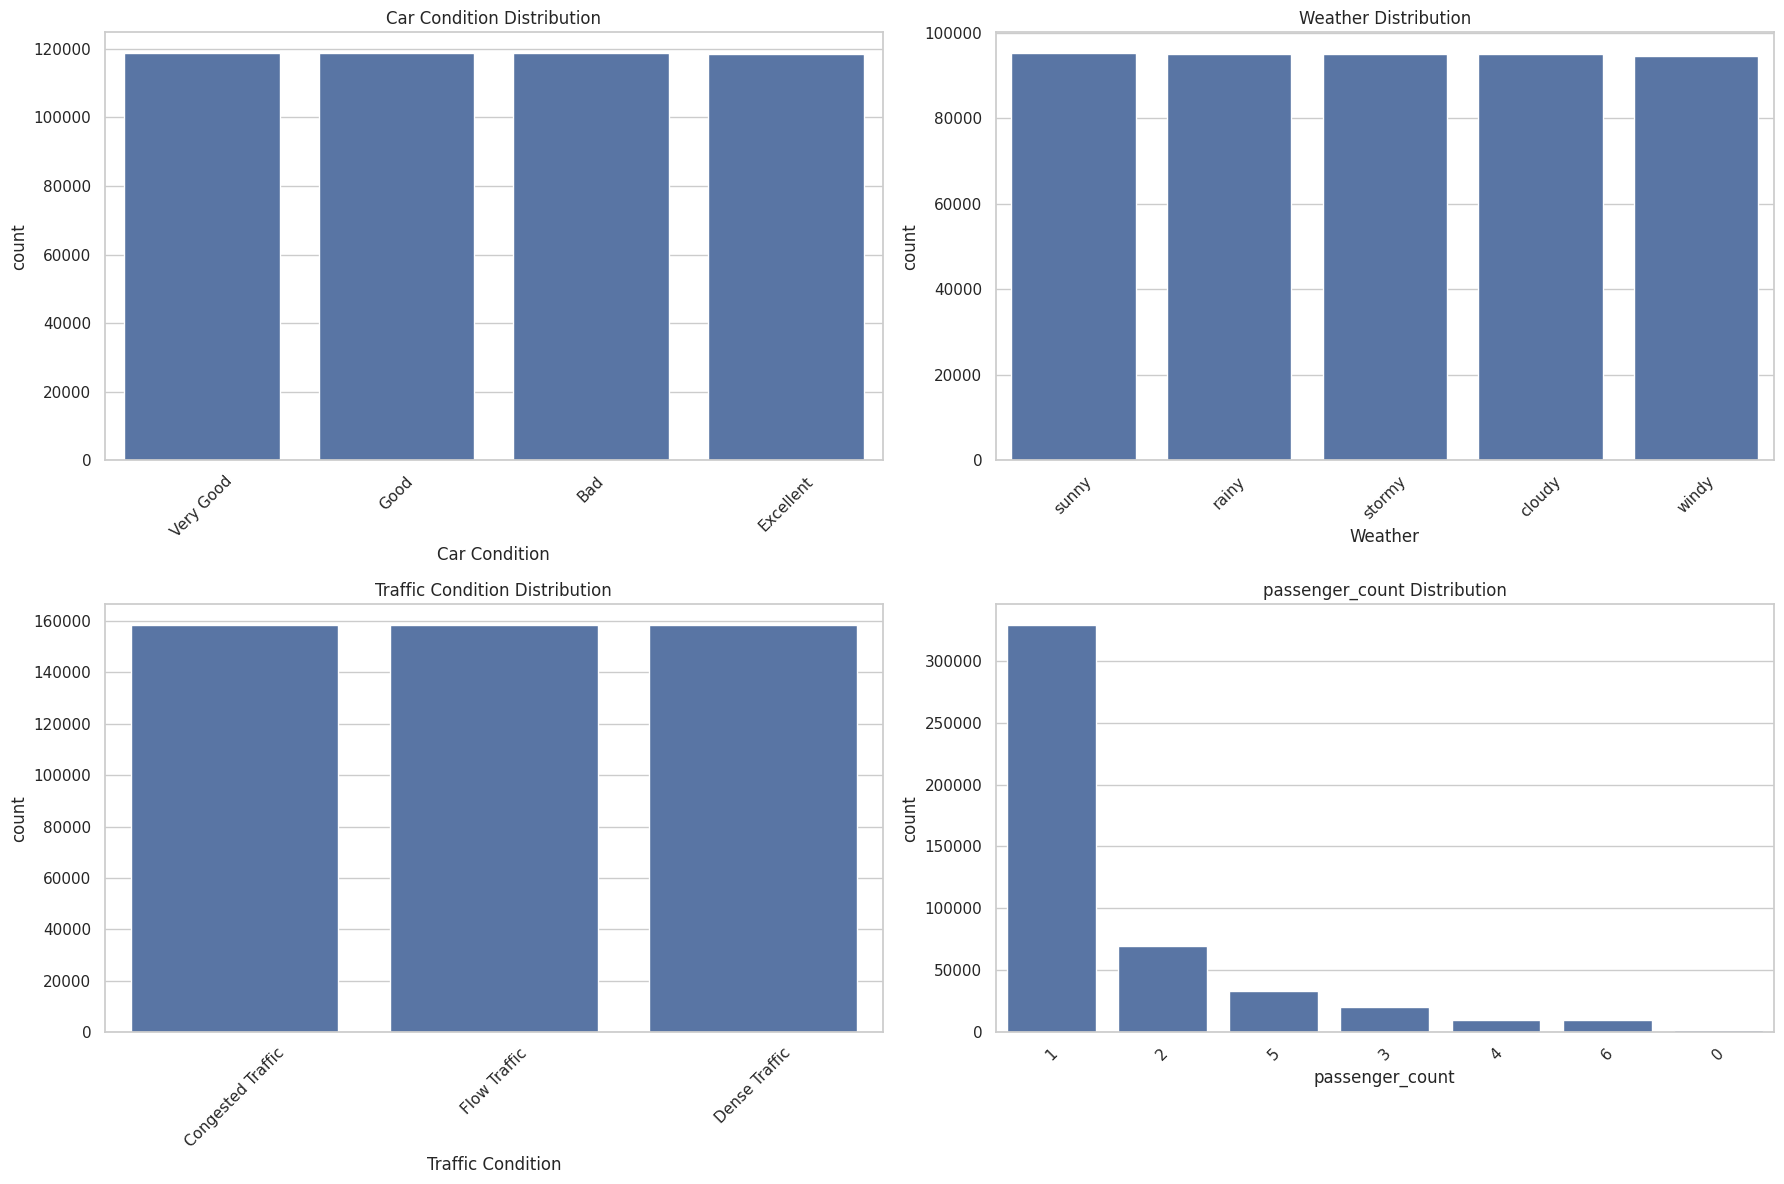

In [83]:
cat_cols = ['Car Condition', 'Weather', 'Traffic Condition', 'passenger_count']

plt.figure(figsize=(18,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Temporal Analysis

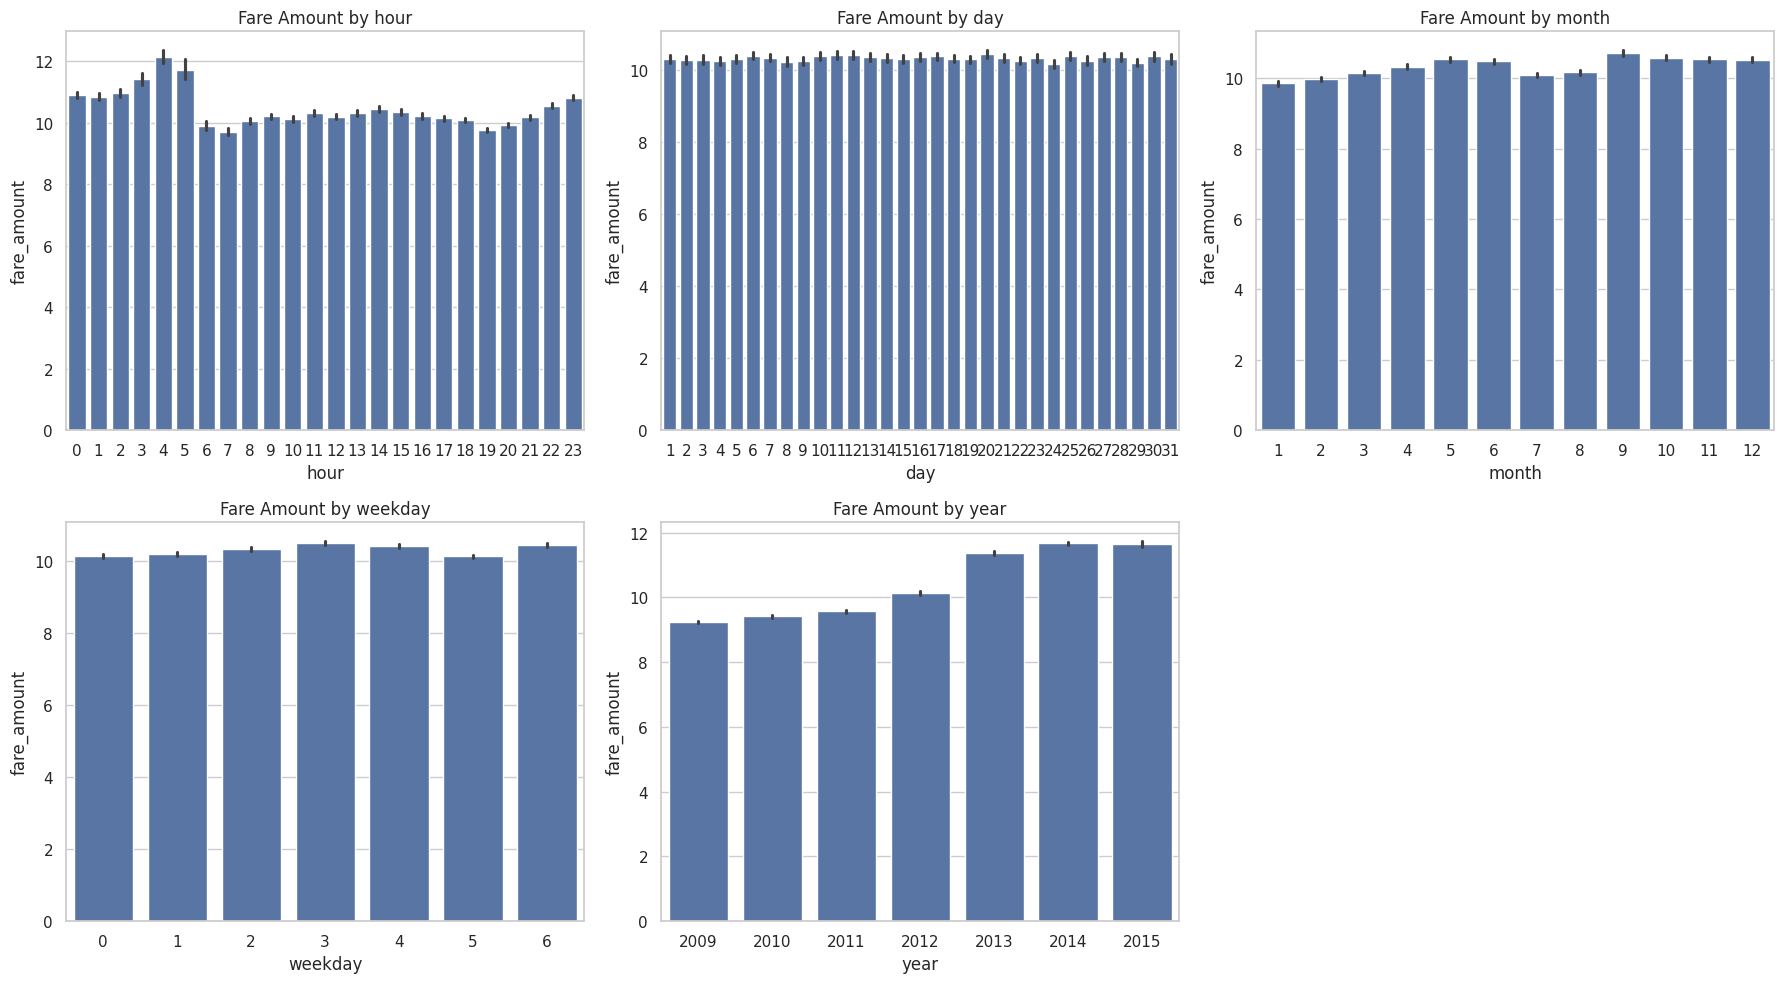

In [84]:
time_cols = ['hour', 'day', 'month', 'weekday', 'year']

plt.figure(figsize=(18,10))
for i, col in enumerate(time_cols, 1):
    plt.subplot(2,3,i)
    sns.barplot(x=col, y='fare_amount', data=df)
    plt.title(f'Fare Amount by {col}')
plt.tight_layout()
plt.show()

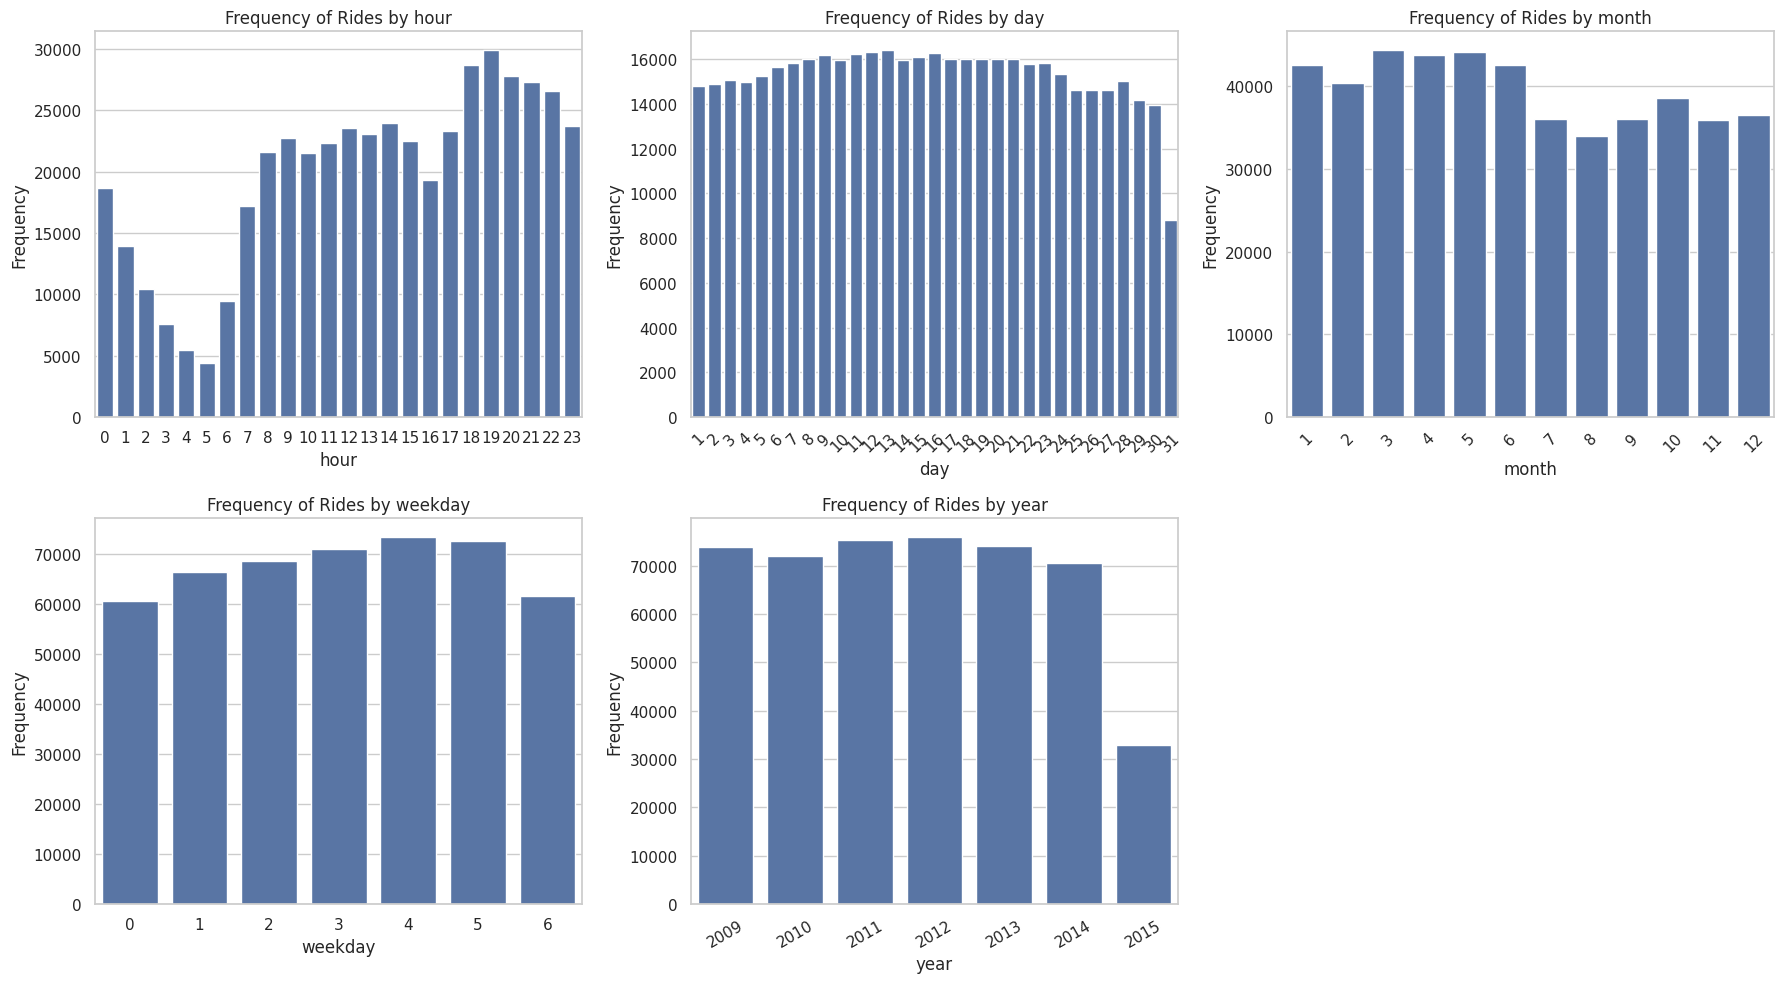

In [85]:
plt.figure(figsize=(18,10))
for i, col in enumerate(time_cols, 1):
    plt.subplot(2, 3, i)
    order = df[col].value_counts().index
    sns.barplot(x=order, y=df[col].value_counts().values)

    plt.title(f'Frequency of Rides by {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    if col in ['hour', 'weekday']:
        plt.xticks(rotation=0)
    elif col in ['day', 'month']:
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


## Fare Amount vs. Distance

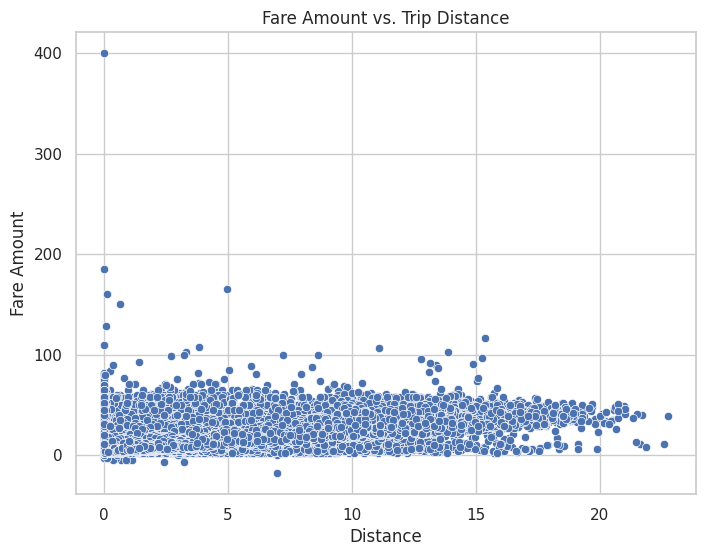

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='distance', y='fare_amount', data=df)
plt.title("Fare Amount vs. Trip Distance")
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.show()

## Fare Amount by Weather Condition

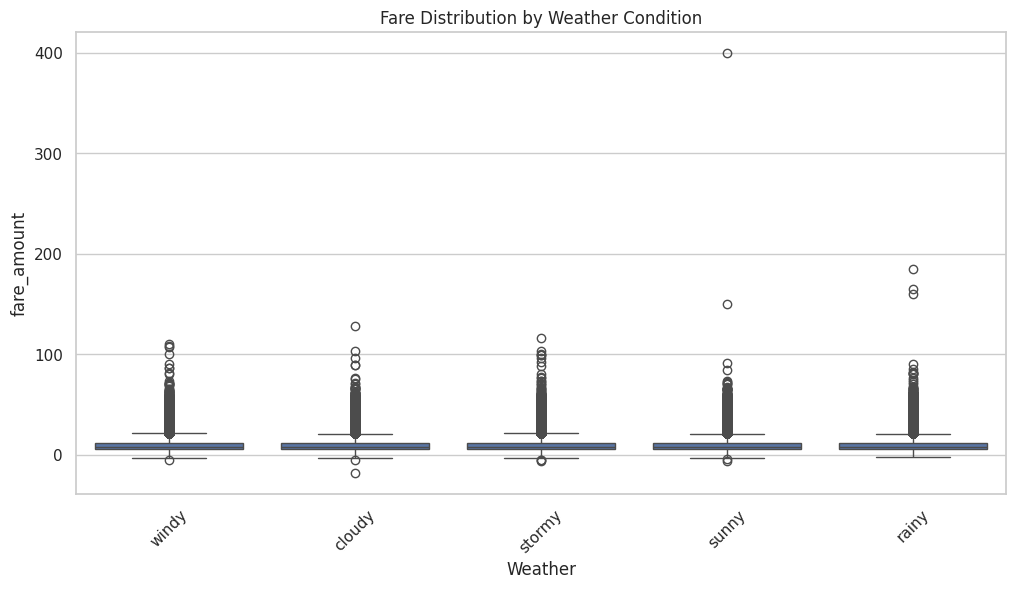

In [87]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Weather', y='fare_amount', data=df)
plt.title('Fare Distribution by Weather Condition')
plt.xticks(rotation=45)
plt.show()

## Pickup Locations Colored by Fare Amount

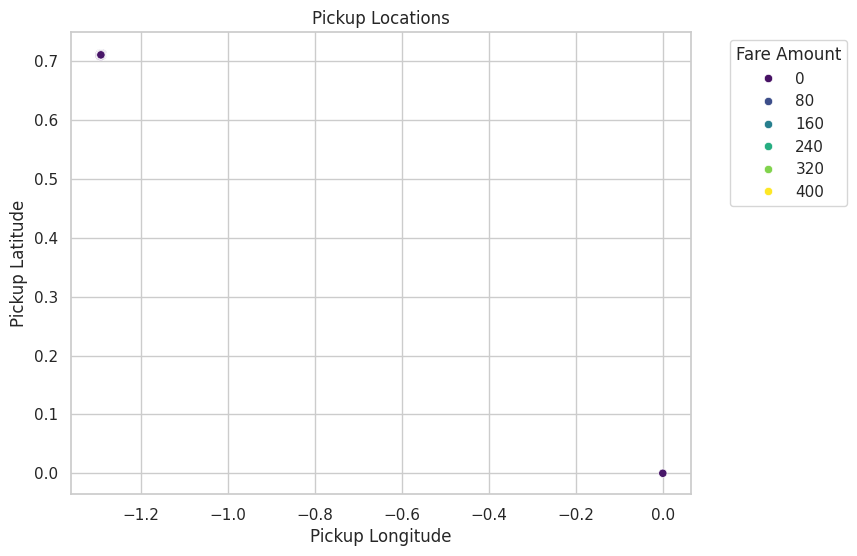

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="pickup_longitude", y="pickup_latitude", data=df, hue="fare_amount", palette="viridis")
plt.title("Pickup Locations")
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.legend(title="Fare Amount", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Airport Distance

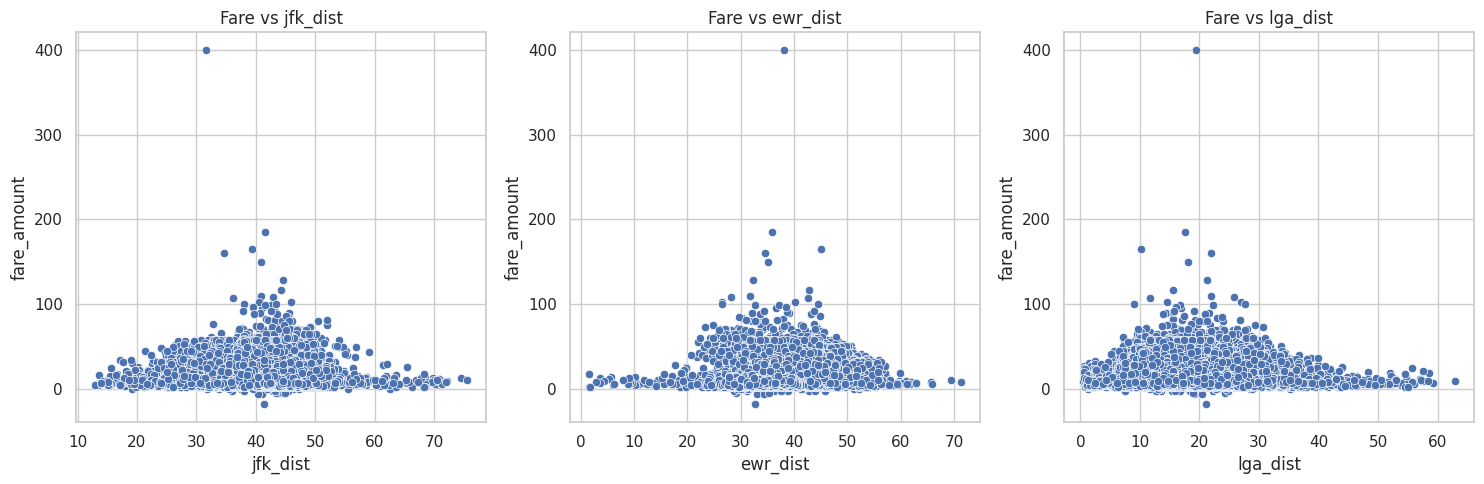

In [89]:
airport_cols = ['jfk_dist', 'ewr_dist', 'lga_dist']
plt.figure(figsize=(15,5))
for i, col in enumerate(airport_cols, 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=col, y='fare_amount', data=df)
    plt.title(f'Fare vs {col}')
plt.tight_layout()
plt.show()

## Correlation Analysis

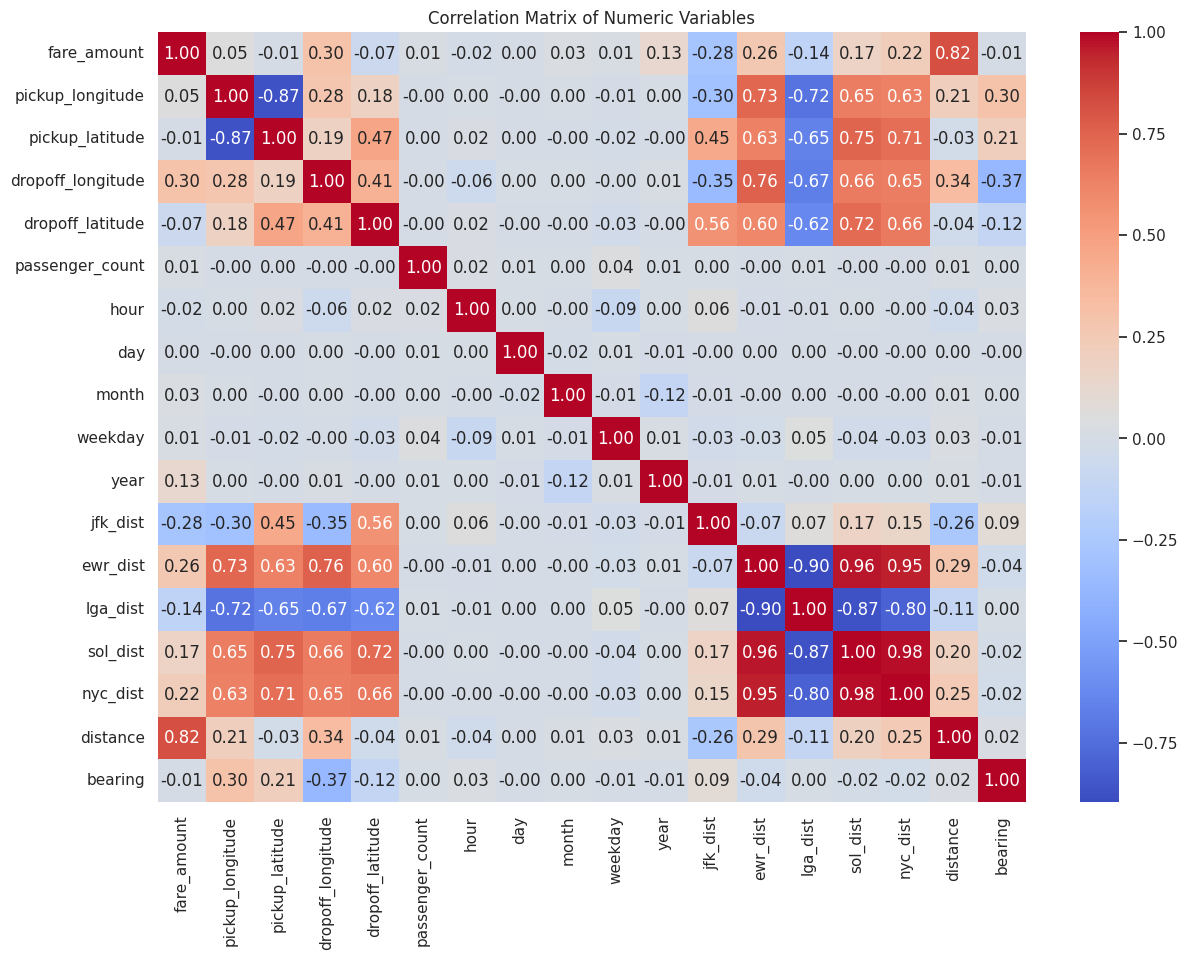

In [90]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

## Fare Amount Outliers

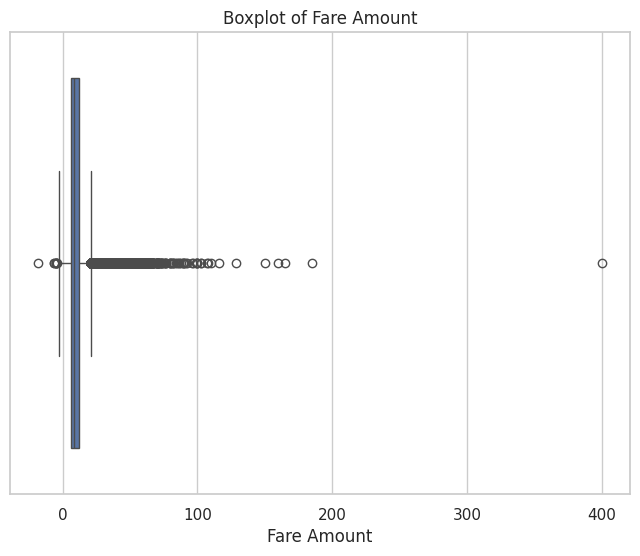

In [91]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.xlabel("Fare Amount")
plt.show()

## Trip Distance Outliers

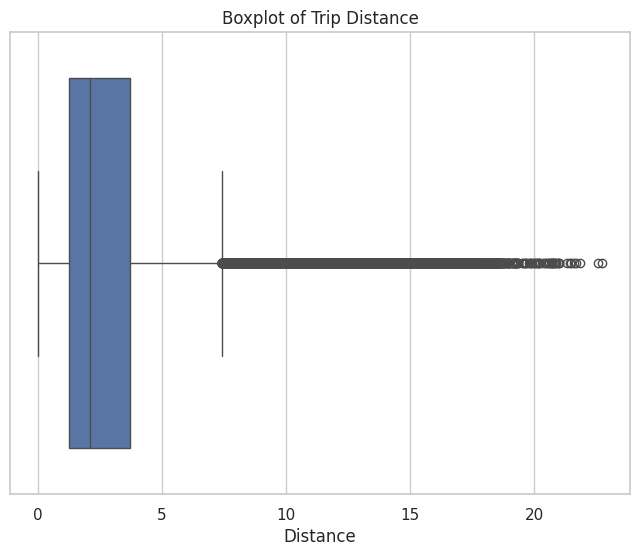

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['distance'])
plt.title("Boxplot of Trip Distance")
plt.xlabel("Distance")
plt.show()

## Compare pickup and drop-off locations to understand spatial movement

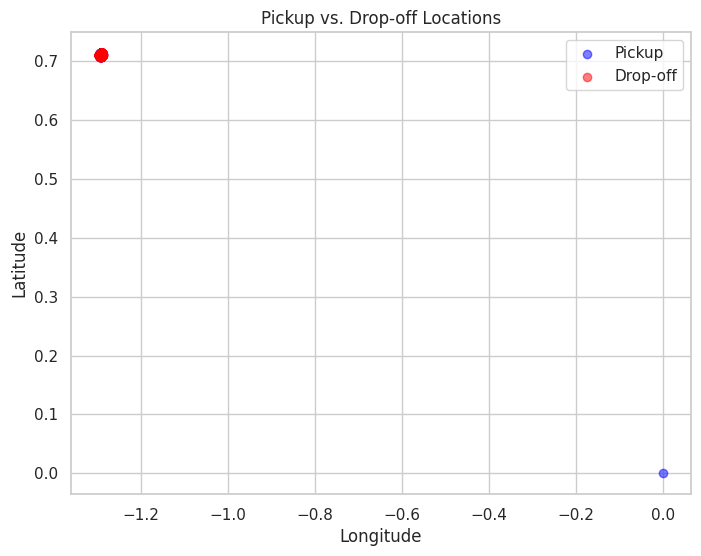

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], color='blue', alpha=0.5, label='Pickup')
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], color='red', alpha=0.5, label='Drop-off')
plt.title("Pickup vs. Drop-off Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

## Pairplot

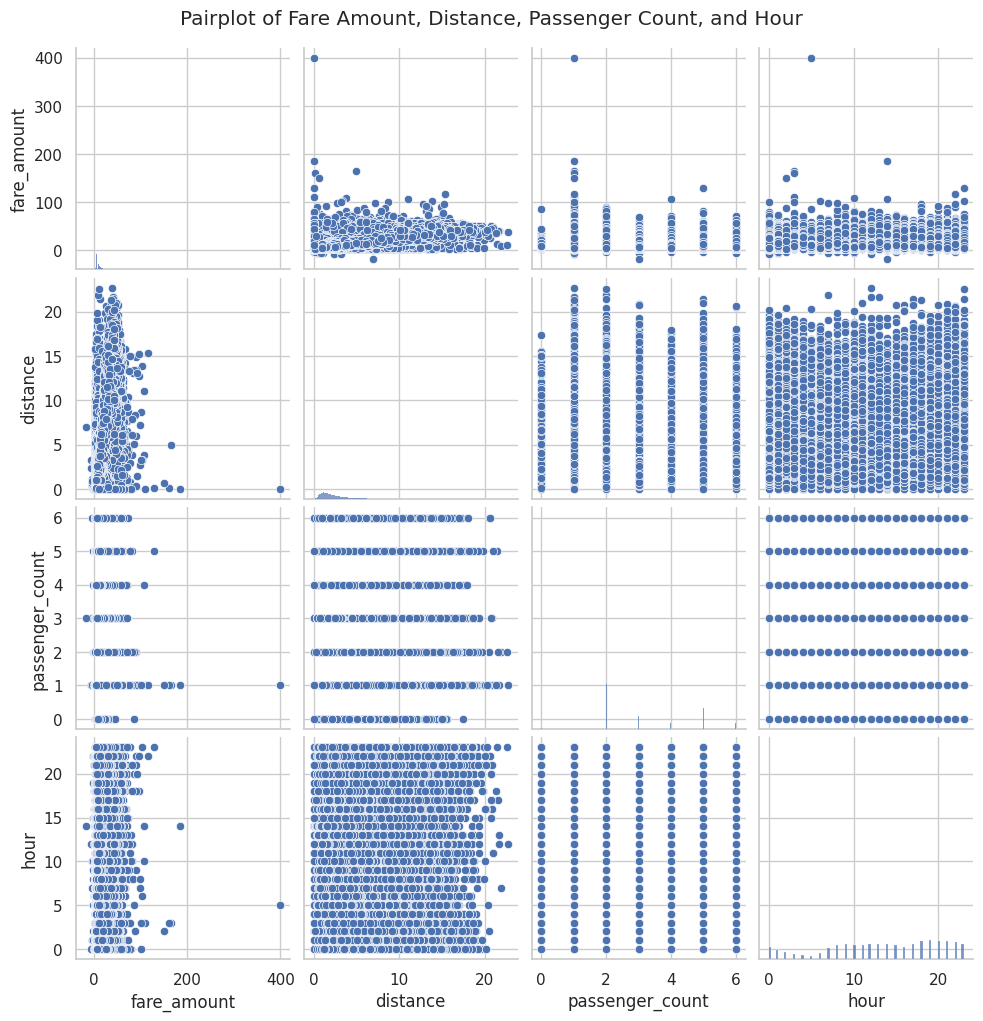

In [94]:
sns.pairplot(df[['fare_amount', 'distance', 'passenger_count', 'hour']])
plt.suptitle("Pairplot of Fare Amount, Distance, Passenger Count, and Hour", y=1.02)
plt.show()

## Violin Plot: Fare Amount by Passenger Count

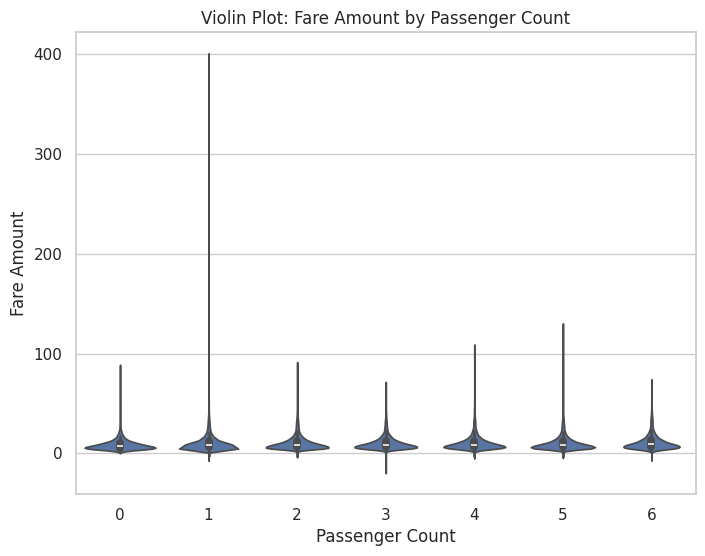

In [95]:
plt.figure(figsize=(8,6))
sns.violinplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Violin Plot: Fare Amount by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.show()

## Trips by Weekday

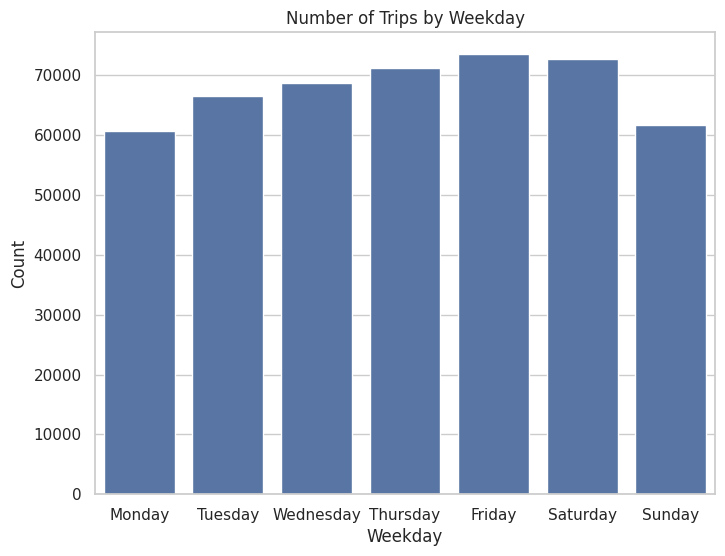

In [96]:
# 0 = Monday
plt.figure(figsize=(8,6))
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='weekday', data=df)
plt.title("Number of Trips by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.xticks(ticks=range(7), labels=weekday_names)
plt.show()

## Trip Distance vs. Bearing

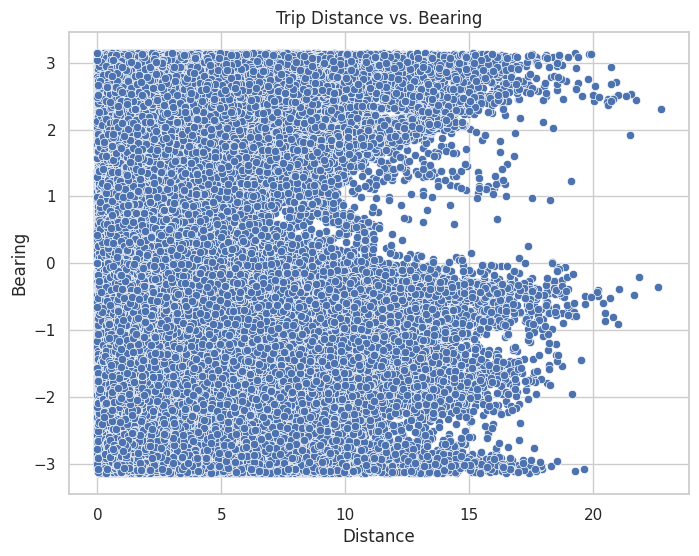

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='distance', y='bearing', data=df)
plt.title("Trip Distance vs. Bearing")
plt.xlabel("Distance")
plt.ylabel("Bearing")
plt.show()

## Car Condition

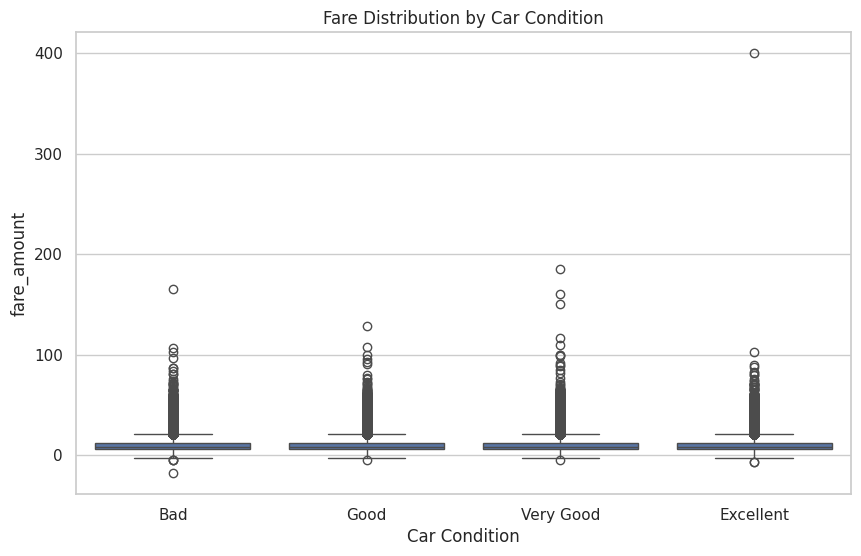

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Car Condition', y='fare_amount', data=df, order=['Bad', 'Good', 'Very Good', 'Excellent'])
plt.title('Fare Distribution by Car Condition')
plt.show()

## Bearing Direction

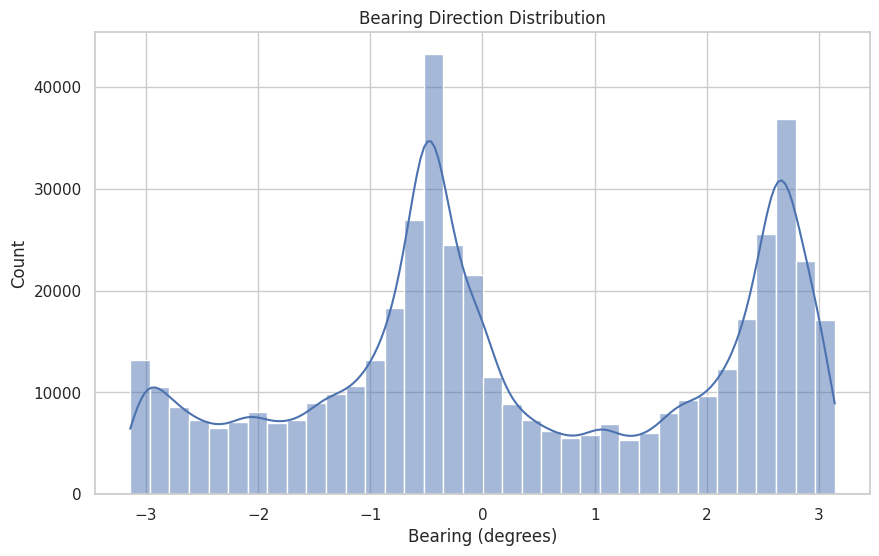

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(df['bearing'], bins=36, kde=True)
plt.title('Bearing Direction Distribution')
plt.xlabel('Bearing (degrees)')
plt.show()

## Distances relate & passenger counts

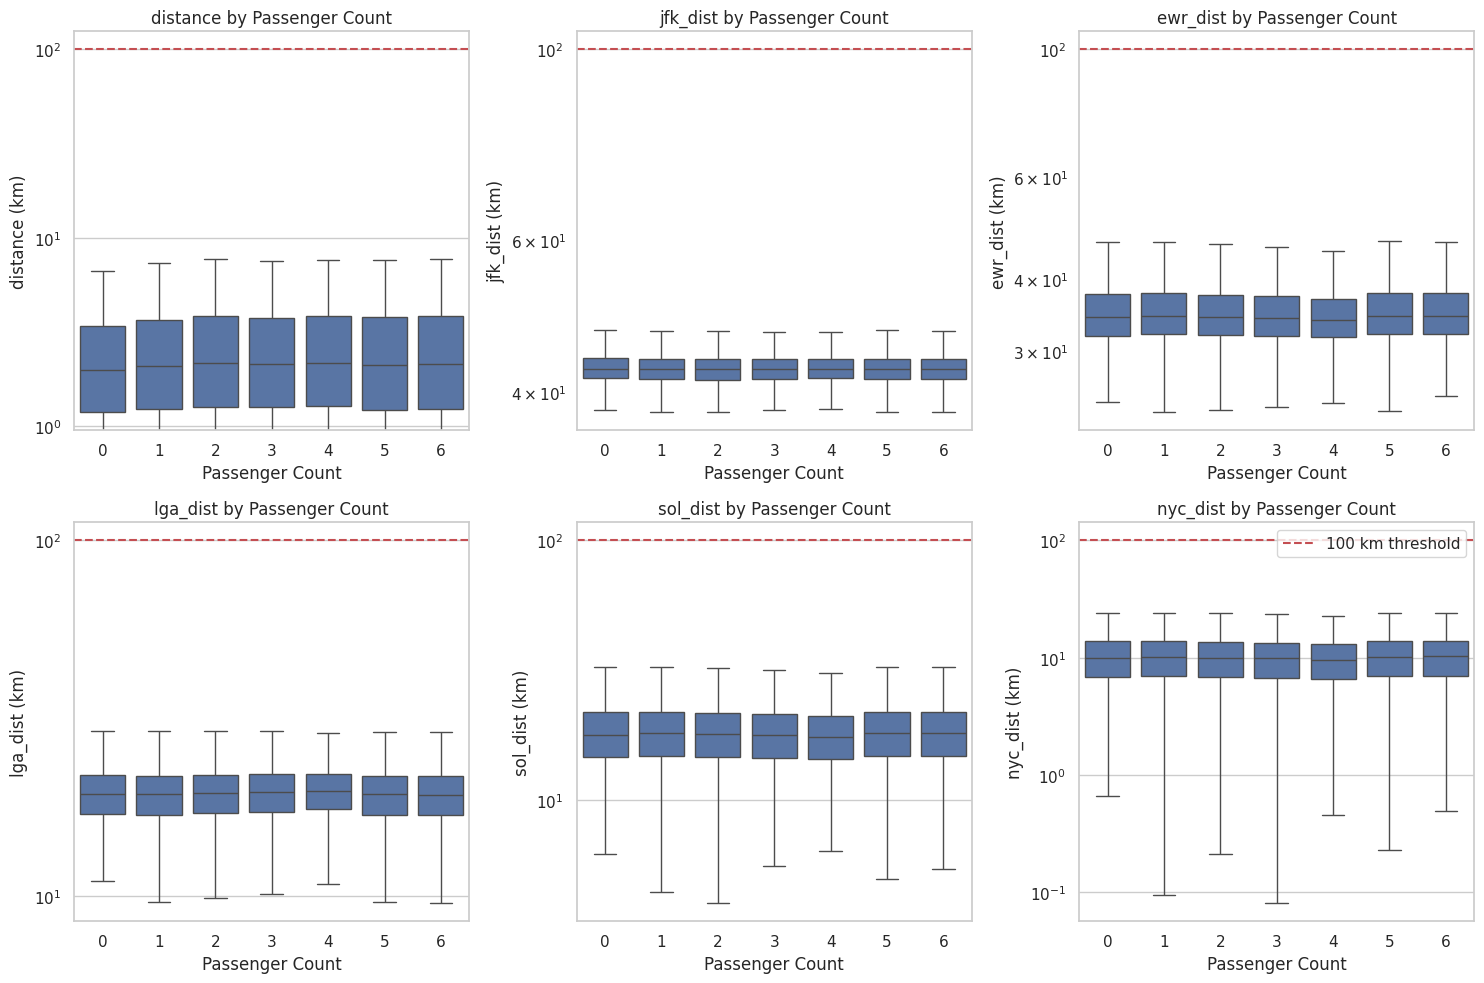

In [100]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

f = ['distance', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']

for i, dist in enumerate(f, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='passenger_count', y=dist, data=df, showfliers=False)
    plt.title(f'{dist} by Passenger Count')
    plt.xlabel('Passenger Count')
    plt.ylabel(f'{dist} (km)')
    plt.yscale('log')
    plt.axhline(y=100, color='r', linestyle='--', label='100 km threshold')

plt.tight_layout()
plt.legend()
plt.show()